
# Prática 6 - Plantão dia 24/08/2021


***Aprendizado Dinâmico***

por **Cibele Russo** (ICMC/USP - São Carlos SP)

**MBA em Ciências de Dados**


Nesta prática vamos desenvolver análises preditivas para os dados VALE3 e Ibovespa de julho de 2020 a julho de 2021.

**Carregue os pacotes que serão utilizados e faça a leitura dos dados, completando os dados faltantes como visto em aula.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("figure",figsize=(12,6))
plt.rc("font",size=15)
plt.rc("lines",linewidth=2)
sns.set_style("darkgrid")

# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")

**Carregue as bibliotecas e faça a leitura dos dados VALE3 e Ibovespa. Utilizaremos a variável Close de ambos, sendo que do Ibovespa será dividido por mil.**

In [2]:
pkgdir = '/hdd/MBA/AprendizadoDinamico/Data'

df = pd.read_csv(f'{pkgdir}/VALE3.csv', index_col=0, parse_dates=True)

idx = pd.date_range(start=df.index.min(), end=df.index.max(), freq='B')
df = df.reindex(idx)

df.fillna(method='ffill', inplace=True)

df.head()

,Open,High,Low,Close,Adj Close,Volume
2020-07-21,60.439999,60.480000,59.270000,59.700001,53.772350,29043600.0
2020-07-22,59.930000,60.250000,58.799999,59.240002,53.358028,19644700.0
2020-07-23,59.900002,60.160000,58.639999,58.849998,53.006744,17291900.0
2020-07-24,58.570000,58.849998,57.820000,58.599998,52.781574,22544100.0
2020-07-27,59.099998,61.630001,58.980000,61.369999,55.276535,35124800.0


In [3]:
df2 = pd.read_csv(f'{pkgdir}/Ibovespa.csv', index_col=0, parse_dates=True)

idx = pd.date_range(start=df2.index.min(), end=df2.index.max(), freq='B')
df2 = df2.reindex(idx)

df2.fillna(method='ffill', inplace=True)

df2.head()

,Open,High,Low,Close,Adj Close,Volume
2020-07-22,104312.0,104980.0,103277.0,104290.0,104290.0,10833700.0
2020-07-23,104291.0,104949.0,102119.0,102293.0,102293.0,10366600.0
2020-07-24,102292.0,102694.0,100859.0,102382.0,102382.0,9795200.0
2020-07-27,102381.0,104585.0,102381.0,104477.0,104477.0,9622400.0
2020-07-28,104477.0,104663.0,103592.0,104109.0,104109.0,9087100.0


**Faça visualizações das séries VALE3 e Ibovespa.**

In [4]:
plt.rcParams['figure.figsize'] = [14,8]

<AxesSubplot:>

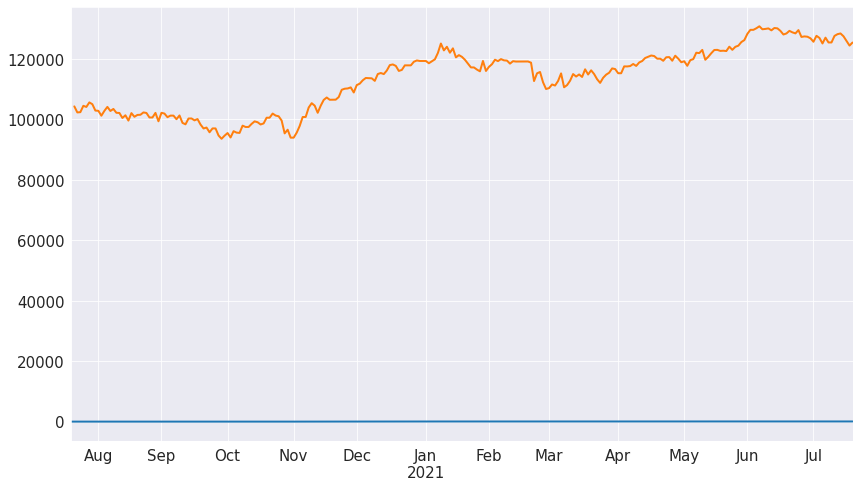

In [5]:
df['Close'].plot()
df2['Close'].plot()

In [6]:
df['IBOV'] = df2['Close']/1000

In [7]:
df

,Open,High,Low,Close,Adj Close,Volume,IBOV
2020-07-21,60.439999,60.480000,59.270000,59.700001,53.772350,29043600.0,NaN
2020-07-22,59.930000,60.250000,58.799999,59.240002,53.358028,19644700.0,104.290
2020-07-23,59.900002,60.160000,58.639999,58.849998,53.006744,17291900.0,102.293
2020-07-24,58.570000,58.849998,57.820000,58.599998,52.781574,22544100.0,102.382
2020-07-27,59.099998,61.630001,58.980000,61.369999,55.276535,35124800.0,104.477
...,...,...,...,...,...,...,...
2021-07-14,116.260002,116.430000,114.440002,115.120003,115.120003,19483600.0,128.407
2021-07-15,114.989998,116.160004,114.500000,115.480003,115.480003,18236100.0,127.468
2021-07-16,115.339996,115.870003,113.000000,113.400002,113.400002,19576800.0,125.960
2021-07-19,112.000000,112.160004,110.209999,112.160004,112.160004,18644300.0,124.395


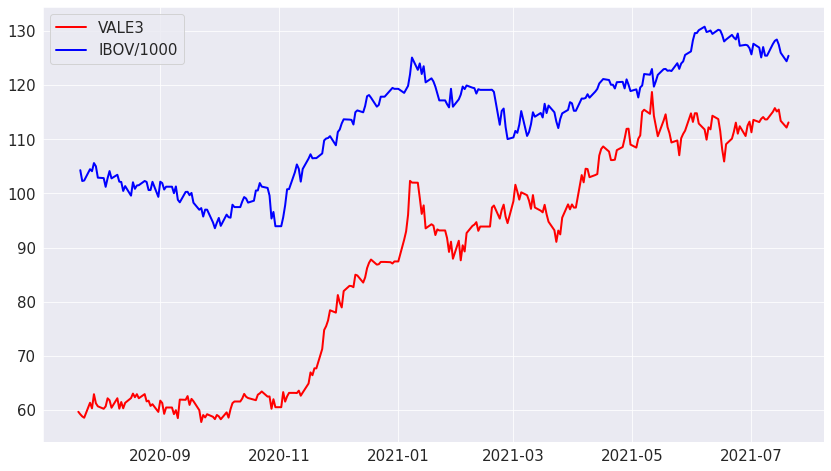

In [8]:
plt.plot(df['Close'],  color = 'red', label = 'VALE3')
plt.plot(df['IBOV'], color='blue', label='IBOV/1000')


plt.legend()
plt.show()



**Defina bases de treino e teste, deixando 30 observações para a base de teste.**

In [9]:
treino = df.iloc[:-30]
teste = df.iloc[-30:]

**Faça uma decomposição da série Close da VALE3 em tendência, sazonalidade e resíduos. Qual o período de sazonalidade mais adequado?**

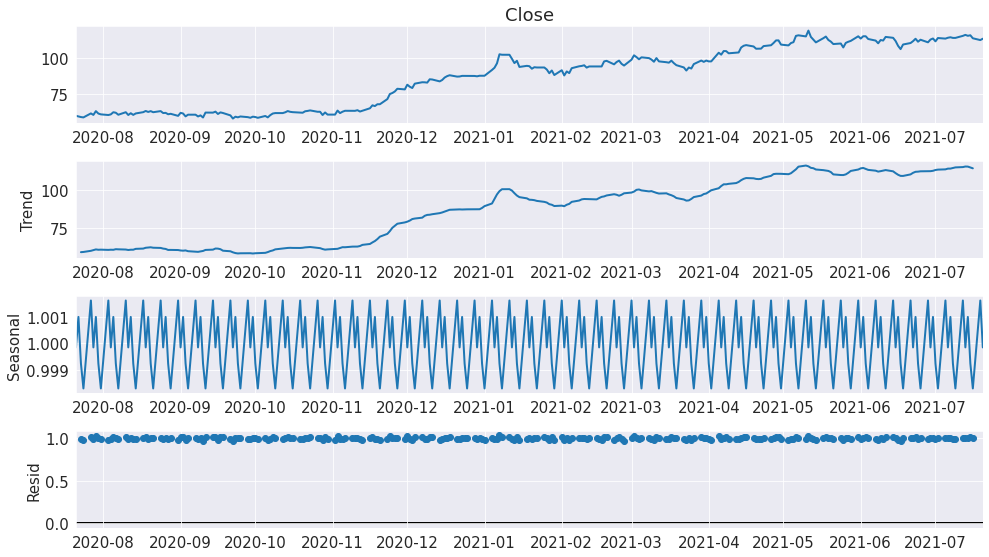

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

result = seasonal_decompose(df['Close'], model='multiplicative', period=5)
result.plot()

pyplot.show()

**Obtenha as previsões pelo Método Theta para a série de dados de treino da VALE3.**

In [11]:
from statsmodels.tsa.forecasting.theta import ThetaModel
tm = ThetaModel(treino['Close'])
res = tm.fit()
print(res.summary())

                              ThetaModel Results                              
Dep. Variable:                  Close   No. Observations:                  231
Method:                       OLS/SES   Deseasonalized:                   True
Date:                Wed, 25 Aug 2021   Deseas. Method:         Multiplicative
Time:                        09:05:34   Period:                              5
Sample:                    07-21-2020                                         
                         - 06-08-2021                                         
  Parameter Estimates   
          Parameters    
------------------------
b0    0.2797856062015886
alpha 0.9204099294914058
------------------------


In [12]:
res = ThetaModel(treino['Close'],deseasonalize=True,period=5).fit()
fcast = res.forecast(30)

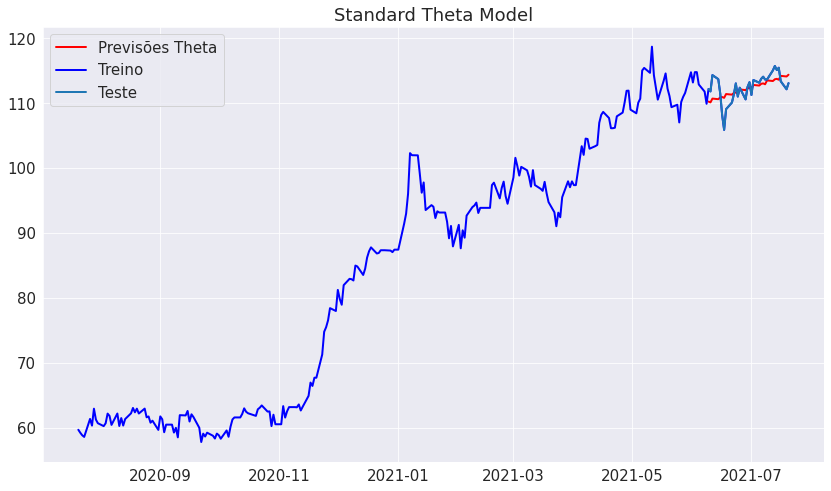

In [13]:
plt.plot(fcast,  color = 'red', label = 'Previsões Theta')
plt.plot(df['Close'],color = 'blue', label = 'Treino')
plt.plot(teste['Close'], label='Teste')
            
plt.title('Standard Theta Model')
plt.legend()
plt.show()

**Aplique o Método de Holt para os dados de teste e preveja as próximas 30 observações.**

In [14]:
# Método de Holt 

from statsmodels.tsa.api import ExponentialSmoothing

modelo_H =  ExponentialSmoothing(treino['Close'], trend='add');
 
ajustado = modelo_H.fit();

df['Holt'] = ajustado.fittedvalues.shift(-1);

predito_H = ajustado.forecast(30).rename('Previsão Holt')




**Represente graficamente os resultados, com as bases de treino e teste.**

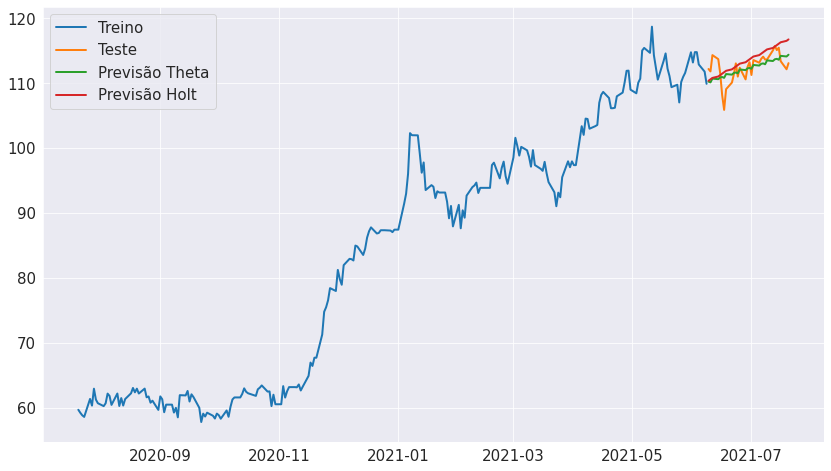

In [15]:
plt.plot(treino['Close'], label='Treino')
plt.plot(teste['Close'], label='Teste')
plt.plot(fcast, label='Previsão Theta')
plt.plot(predito_H, label='Previsão Holt')

plt.legend()
plt.show()


**Utilize o EQM para comparar as previsões. Qual o melhor método?**

In [16]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(teste['Close'], fcast)
print(f'EQM Theta: {error:11.10}')


error = mean_squared_error(teste['Close'], predito_H)
print(f'EQM Holt: {error:11.10}')

EQM Theta:  3.21173094
EQM Holt:  5.00802345


**Repita os procedimentos para obter previsões para dados futuros, ou seja, utilizando todos os dados disponíveis e fazendo previsões para os próximos 20 dias.**

In [17]:
# Método Theta

from statsmodels.tsa.forecasting.theta import ThetaModel

res = ThetaModel(df['Close'],deseasonalize=True,period=5).fit()
fcast = res.forecast(20)




In [18]:
# Método de Holt 

from statsmodels.tsa.api import ExponentialSmoothing

modelo_H =  ExponentialSmoothing(df['Close'], trend='add');
 
ajustado = modelo_H.fit();

df['Holt'] = ajustado.fittedvalues.shift(-1);

predito_H = ajustado.forecast(20).rename('Previsão Holt')




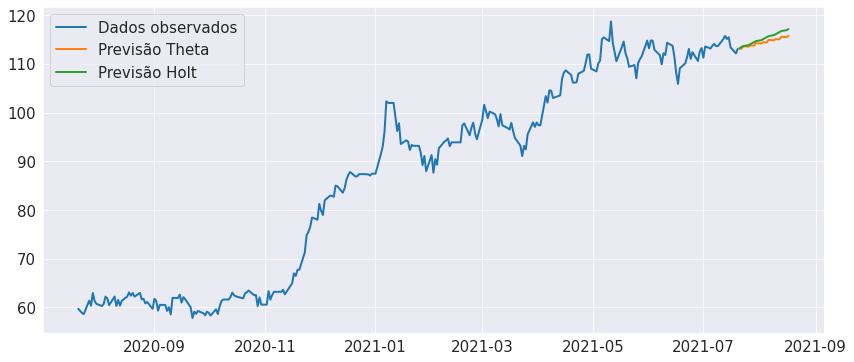

In [19]:
plt.figure(figsize = (14,6))


plt.plot(df['Close'], label='Dados observados')
plt.plot(fcast, label='Previsão Theta')
plt.plot(predito_H, label='Previsão Holt')

plt.legend()
plt.show()


**Considere uma análise de regressão com as variáveis Close, sendo que a resposta seria da VALE3 e preditora do Ibovespa**

In [20]:
# Observação: Nos dados Ibovespa falta a observação de 21/07/2020, portanto consideraremos a partir de 22/07/2020

df = df.iloc[df.index > '2020-07-22']

<AxesSubplot:xlabel='IBOV', ylabel='Close'>

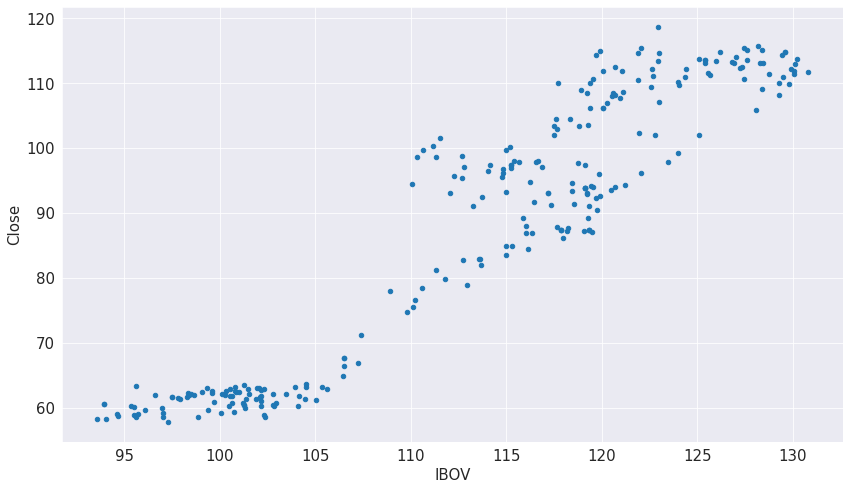

In [21]:
df.plot.scatter('IBOV','Close')

In [22]:
from statsmodels.formula.api import ols

# Ajusta o modelo de regressão linear simples para Close com IBOV/1000 como preditora
modelo = ols('Close ~ IBOV',data=df)
res = modelo.fit()

# valores ajustados de E(Y)
ypred=res.fittedvalues

# resíduo=observado-ajustado
residuo = res.resid


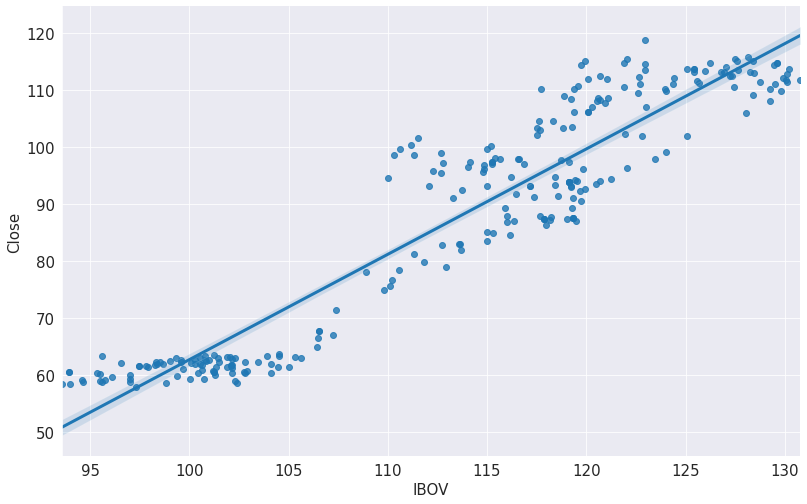

In [23]:
import seaborn as sns


sns.lmplot(y = 'Close', x='IBOV', data=df, height=7, aspect=1.6)

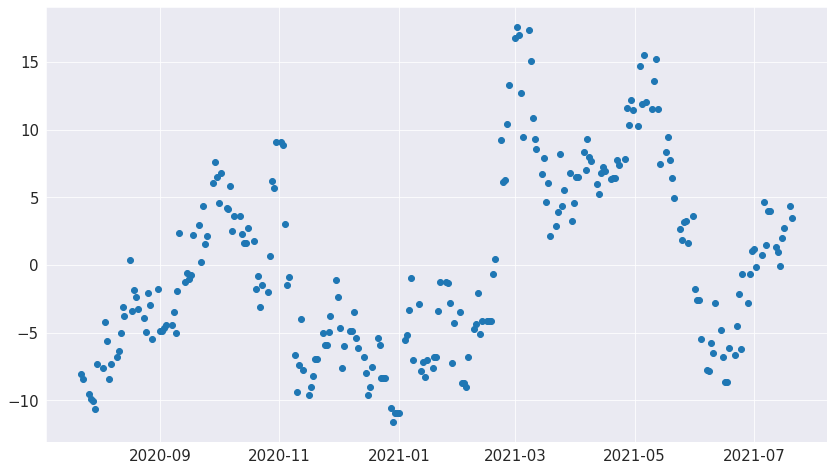

In [24]:
plt.scatter(residuo.index,residuo)

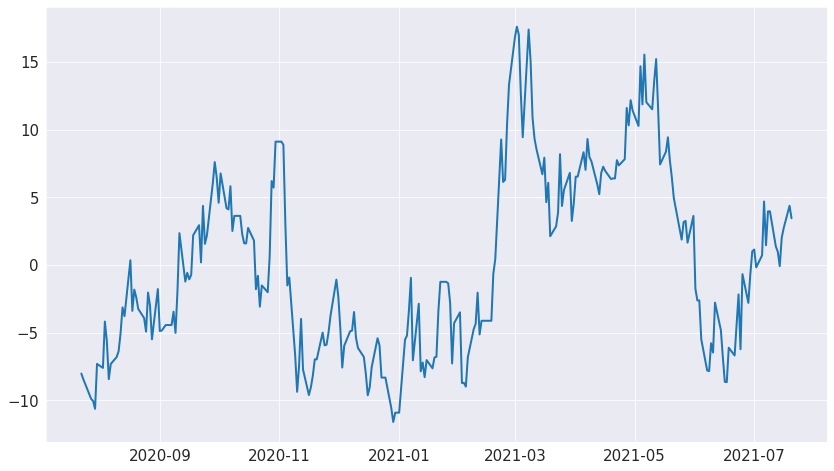

In [25]:
plt.plot(residuo)

In [26]:
from pmdarima import auto_arima

In [27]:
stepwise_fit = auto_arima(residuo, start_p=0, start_q=0,
                          max_p=4, max_q=4, 
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1181.645, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1175.336, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1175.677, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1179.736, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1177.334, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1177.335, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1179.298, Time=0.89 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1173.471, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1175.469, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1175.470, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1173.818, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1177.427, Time=0.31 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 2.308 seconds


**Tentativa: Um modelo SARIMAX para a série Close do VALE3 utilizando a série Close do Ibovespa como variável exógena considerando order=(1,1,0).**

In [28]:
endog = df['Close']
exog = df['IBOV']

In [29]:
import statsmodels.api as sm

modelo = sm.tsa.statespace.SARIMAX(endog, exog, order=(1,1,0))
resultado = modelo.fit(disp=False)
print(resultado.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  259
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -474.701
Date:                Wed, 25 Aug 2021   AIC                            955.403
Time:                        09:05:45   BIC                            966.062
Sample:                    07-23-2020   HQIC                           959.689
                         - 07-20-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
IBOV           0.5793      0.071      8.130      0.000       0.440       0.719
ar.L1         -0.1245      0.058     -2.136      0.033      -0.239      -0.010
sigma2         2.3208      0.183     12.661      0.0

**Exercício: obtenha as previsões passo à frente e dinâmica para os próximos 20 dias com esse modelo e compare com a previsão pelo método Theta. Verifique se ainda existem padrões nos resíduos.**